# Regression Week 4 : Ridge Regression Assignment

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
def polynomial_dataframe(feature, degree):
    df = pd.DataFrame()
    
    df['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            df[name] = feature.map(lambda x : math.pow(x, power))
            
    return df

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
total_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)

In [4]:
total_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
total_data = total_data.sort_values(by='sqft_living')

In [19]:
total_data['price'].iloc[[0]]

19452    142000
Name: price, dtype: float64

In [6]:
poly15_data = polynomial_dataframe(total_data['sqft_living'], 15)

In [7]:
poly15_data['price'] = total_data['price']
poly15_data['power_1'] = poly15_data['power_1'].astype('float')

print poly15_data.dtypes
print poly15_data.head()

power_1     float64
power_2     float64
power_3     float64
power_4     float64
power_5     float64
power_6     float64
power_7     float64
power_8     float64
power_9     float64
power_10    float64
power_11    float64
power_12    float64
power_13    float64
power_14    float64
power_15    float64
price       float64
dtype: object
       power_1  power_2   power_3      power_4       power_5       power_6  \
19452      290    84100  24389000   7072810000  2.051115e+12  5.948233e+14   
15381      370   136900  50653000  18741610000  6.934396e+12  2.565726e+15   
860        380   144400  54872000  20851360000  7.923517e+12  3.010936e+15   
18379      384   147456  56623104  21743271936  8.349416e+12  3.206176e+15   
4868       390   152100  59319000  23134410000  9.022420e+12  3.518744e+15   

            power_7       power_8       power_9      power_10      power_11  \
19452  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24  1.220051e+27   
15381  9.493188e+17  3.512479e+20  1.29

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

[[  1.08339591e+02   1.83241924e-02   2.10252821e-06   1.25459141e-10
    4.76745385e-15   1.12578773e-19  -2.75007818e-24  -7.34396575e-28
   -8.15280049e-32  -7.50391387e-36  -6.38019791e-40  -5.19894857e-44
   -4.12787150e-48  -3.22161975e-52  -2.48428800e-56]]
[ 180195.62379998]


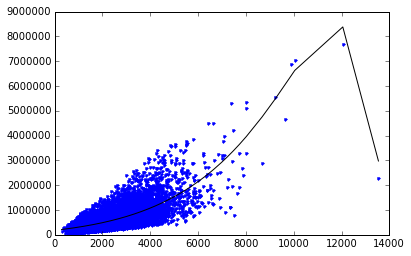

In [42]:
model1 = Ridge(alpha = 1e-5, normalize = True, max_iter  = 10, solver='sag', tol=0.01, fit_intercept = True)
model1.fit(poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']], poly15_data['price'].reshape(-1, 1))



print model1.coef_
print model1.intercept_


plt.plot(poly15_data['power_1'], poly15_data['price'], 'b.',
        poly15_data['power_1'], model1.predict(poly15_data[poly15_data.columns.values[:-1]]), 'k-')
plt.show()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline



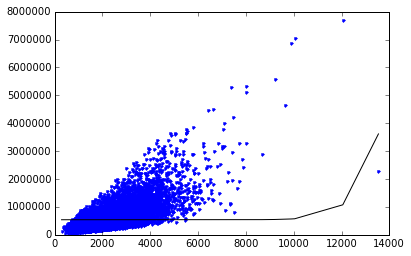

In [37]:

plt.plot(poly15_data['power_1'], poly15_data['price'], 'b.',
        poly15_data['power_1'], model1.predict(poly15_data[poly15_data.columns.values[:-1]]), 'k-')
plt.show()

In [15]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_1 = set_1.sort_values(by='sqft_living')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_2 = set_2.sort_values(by='sqft_living')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_3 = set_3.sort_values(by='sqft_living')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')
set_4 = set_4.sort_values(by='sqft_living')

In [16]:
poly15_set1 = polynomial_dataframe(set_1['sqft_living'], 15)
poly15_set1['price'] = set_1['price']

poly15_set2 = polynomial_dataframe(set_2['sqft_living'], 15)
poly15_set2['price'] = set_2['price']

poly15_set3 = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_set3['price'] = set_3['price']

poly15_set4 = polynomial_dataframe(set_4['sqft_living'], 15)
poly15_set4['price'] = set_4['price']

[  6.89860109e-77   2.30564548e-39  -6.26613582e-45   1.61467895e-49
  -1.20610581e-53   4.32098764e-57   7.38943347e-55   2.90542488e-51
   1.05789428e-47   3.41158386e-44   8.90182860e-41   1.46701028e-37
  -5.97096863e-41   8.09435893e-45  -3.65268987e-49]


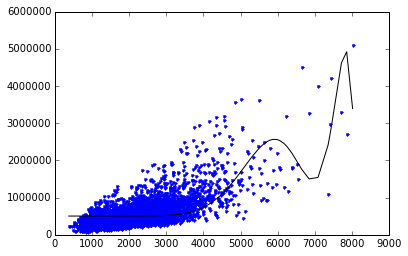

In [17]:
model_sub1 = LinearRegression()
model_sub1.fit(poly15_set1[list(poly15_set1.columns.values)[:-1]], poly15_set1['price'])

print model_sub1.coef_
plt.plot(poly15_set1['power_1'], poly15_set1['price'], 'b.',
        poly15_set1['power_1'], model_sub1.predict(poly15_set1[list(poly15_set1.columns.values)[:-1]]), 'k-')
plt.show()

[  3.77768351e-89   2.76245721e-49   2.32310476e-55   1.32022205e-59
   3.58444237e-73   8.23654532e-70   5.58800927e-66   3.70078615e-62
   2.36186154e-58   1.42277710e-54   7.79727693e-51   3.59813838e-47
   1.11812668e-43  -2.09221413e-47   9.66668329e-52]


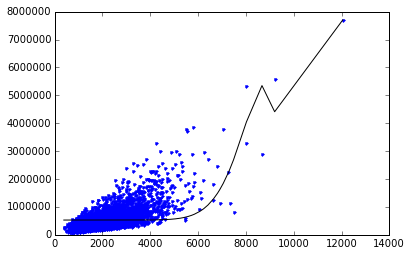

In [18]:
model_sub2 = LinearRegression()
model_sub2.fit(poly15_set2[list(poly15_set2.columns.values)[:-1]], poly15_set2['price'])

print model_sub2.coef_
plt.plot(poly15_set2['power_1'], poly15_set2['price'], 'b.',
        poly15_set2['power_1'], model_sub2.predict(poly15_set2[list(poly15_set2.columns.values)[:-1]]), 'k-')
plt.show()

[  1.77405472e-78  -9.12843319e-40  -2.45022793e-45  -1.26000959e-50
   5.16587057e-54  -1.14566603e-57   5.03719297e-56   2.37243120e-52
   1.03679711e-48   4.01982482e-45   1.26294736e-41   2.50960546e-38
  -8.30432271e-42   9.11385637e-46  -3.31869231e-50]


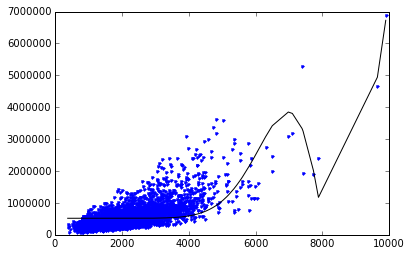

In [19]:
model_sub3 = LinearRegression()
model_sub3.fit(poly15_set3[list(poly15_set3.columns.values)[:-1]], poly15_set3['price'])

print model_sub3.coef_
plt.plot(poly15_set3['power_1'], poly15_set3['price'], 'b.',
        poly15_set3['power_1'], model_sub3.predict(poly15_set3[list(poly15_set3.columns.values)[:-1]]), 'k-')
plt.show()

[  4.35841709e-89   2.55253894e-48  -1.07746278e-54  -3.03348150e-60
   1.59328014e-73   8.32740031e-70   5.54648170e-66   3.62756702e-62
   2.30173412e-58   1.38870224e-54   7.68212259e-51   3.60753696e-47
   1.15031316e-43  -1.97171292e-47   8.28782426e-52]


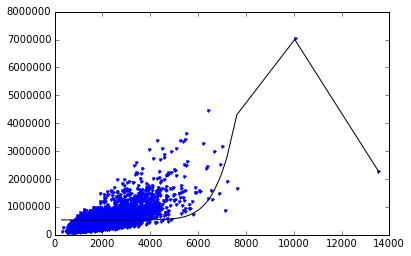

In [20]:
model_sub4 = LinearRegression()
model_sub4.fit(poly15_set4[list(poly15_set4.columns.values)[:-1]], poly15_set4['price'])

print model_sub4.coef_
plt.plot(poly15_set4['power_1'], poly15_set4['price'], 'b.',
        poly15_set4['power_1'], model_sub4.predict(poly15_set4[list(poly15_set4.columns.values)[:-1]]), 'k-')
plt.show()

In [21]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

[  4.62863191e-106   2.71711638e-102   1.41605518e-098   7.64276770e-095
   4.41166220e-091   2.72270714e-087   1.77717351e-083   1.21135283e-079
   8.52736992e-076   6.14688662e-072   4.50914544e-068   3.35135181e-064
   2.51584780e-060   1.90340350e-056   1.44901168e-052]
540528.128166


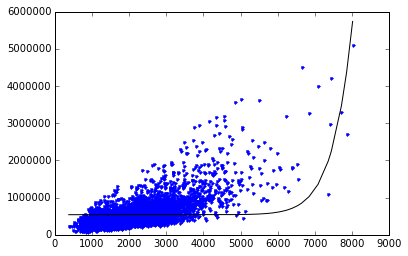

In [33]:
cols = list(poly15_set1.columns.values)[:-1]

model_ridge_sub1 = Ridge(alpha = 1e5, solver = 'lsqr')
model_ridge_sub1.fit(poly15_set1[cols], poly15_set1['price'])

print model_ridge_sub1.coef_
print model_ridge_sub1.predict(poly15_set1[cols])[0]
plt.plot(poly15_set1['power_1'], poly15_set1['price'], 'b.',
        poly15_set1['power_1'], model_ridge_sub1.predict(poly15_set1[cols]), 'k-')
plt.show()

[  4.82928990e-111   3.08717532e-107   1.93049528e-103   1.40865655e-099
   1.21651847e-095   1.19191605e-091   1.26448852e-087   1.40623722e-083
   1.60834427e-079   1.87142077e-075   2.20152137e-071   2.60860589e-067
   3.10609183e-063   3.71094552e-059   4.44408737e-055]


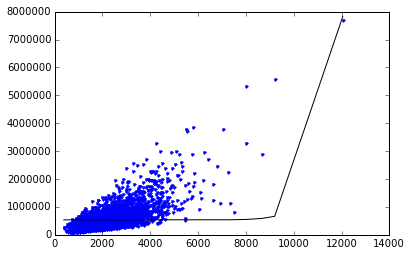

In [34]:
cols = list(poly15_set2.columns.values)[:-1]

model_ridge_sub2 = Ridge(alpha=1e5, solver='lsqr')
model_ridge_sub2.fit(poly15_set2[cols], poly15_set2['price'])

print model_ridge_sub2.coef_
plt.plot(poly15_set2['power_1'], poly15_set2['price'], 'b.',
        poly15_set2['power_1'], model_ridge_sub2.predict(poly15_set2[cols]), 'k-')
plt.show()

[  1.18685336e-108   7.23894281e-105   4.08296920e-101   2.52651039e-097
   1.77199528e-093   1.38631817e-089   1.17344805e-085   1.04578235e-081
   9.62815922e-078   9.04836824e-074   8.61688742e-070   8.27830333e-066
   8.00070472e-062   7.76479903e-058   7.55841886e-054]


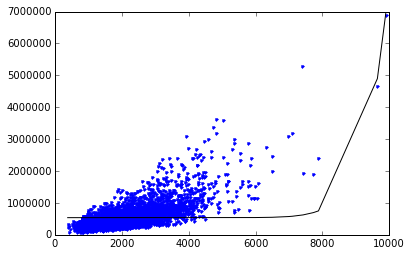

In [35]:
cols = list(poly15_set3.columns.values)[:-1]

model_ridge_sub3 = Ridge(alpha=1e5, solver='lsqr')
model_ridge_sub3.fit(poly15_set3[cols], poly15_set3['price'])

print model_ridge_sub3.coef_
plt.plot(poly15_set3['power_1'], poly15_set3['price'], 'b.',
        poly15_set3['power_1'], model_ridge_sub3.predict(poly15_set3[cols]), 'k-')
plt.show()

[  1.42829196e-112   8.62200496e-109   4.92263480e-105   3.24083700e-101
   2.59782491e-097   2.48485428e-093   2.69219480e-089   3.15253788e-085
   3.86993944e-081   4.89285613e-077   6.30717846e-073   8.23925876e-069
   1.08654109e-064   1.44272099e-060   1.92533585e-056]


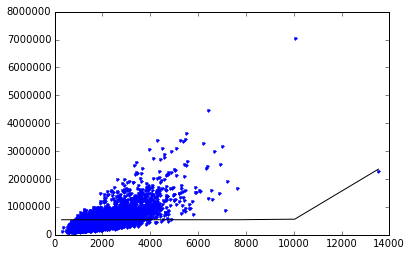

In [36]:
cols = list(poly15_set4.columns.values)[:-1]

model_ridge_sub4 = Ridge(alpha=1e5, solver='lsqr')
model_ridge_sub4.fit(poly15_set4[cols], poly15_set4['price'])

print model_ridge_sub4.coef_
plt.plot(poly15_set4['power_1'], poly15_set4['price'], 'b.',
        poly15_set4['power_1'], model_ridge_sub4.predict(poly15_set4[cols]), 'k-')
plt.show()

In [38]:
shuffled_data = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')

In [39]:
shuffled_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2770601782,20140801T000000,453000,3,2.5,1510,1618,2.5,0,0,...,8,1330,180,2011,0,98199,47.6515,-122.384,1350,1397
1,8581200350,20140617T000000,187500,3,1.5,1180,7000,1.0,0,0,...,7,1180,0,1977,0,98023,47.2966,-122.374,1180,7370
2,7524200330,20150316T000000,290000,4,2.0,1630,7618,1.5,0,0,...,7,1630,0,1967,0,98198,47.3658,-122.317,1320,8774
3,3331500121,20150210T000000,342888,2,1.0,790,5150,1.0,0,0,...,6,790,0,1948,0,98118,47.5528,-122.272,1460,5150
4,9297300045,20140709T000000,550000,3,2.0,1970,4166,2.0,0,3,...,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166


In [100]:
def k_fold_validation_error(k, l2_penalty, dataframe, output, features):
    n = len(dataframe.index)
    errors = []
    
    for i in range(k):
        start = (i*n)/k
        end = start + (n/k)
        
        valid_set = dataframe[start:end]
        train_set = dataframe[0:start].append(dataframe[end:n])
                                    
        model = Ridge(alpha=l2_penalty)
        model.fit(train_set[features], train_set[output])
        
        rss = np.sum((model.predict(valid_set[features]) - valid_set[output]) ** 2)
        errors.append(rss)
        
    return np.average(errors)
        

In [65]:
shuffle_data = polynomial_dataframe(shuffled_data['sqft_living'], 15)
shuffle_data['price'] = shuffled_data['price']
shuffle_data.head()
print len(shuffle_data)

19396


In [101]:
for penalty in np.logspace(1, 7, num=13):
    avg_error = k_fold_validation_error(10, penalty, shuffle_data, 'price', list(shuffle_data.columns.values[:-1]))
    print avg_error, penalty
    

1.71464676073e+24 10.0
1.5606281464e+24 31.6227766017
1.24841361717e+24 100.0
8.62667727009e+23 316.227766017
6.02648072812e+23 1000.0
4.91157262893e+23 3162.27766017
4.52238436444e+23 10000.0
4.3955074628e+23 31622.7766017
4.35500368419e+23 100000.0
4.34215708291e+23 316227.766017
4.33809081792e+23 1000000.0
4.33680457042e+23 3162277.66017
4.33639778509e+23 10000000.0


In [103]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv')
test_data = pd.read_csv('wk3_kc_house_test_data.csv')

In [104]:
train = polynomial_dataframe(train_data['sqft_living'], 15)
train['price'] = train_data['price']
test = polynomial_dataframe(test_data['sqft_living'], 15)
test['price'] = test_data['price']

In [106]:
model = Ridge(alpha = 10000000.0, solver='lsqr')
model.fit(train[list(train.columns.values[:-1])], train['price'])

Ridge(alpha=10000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [107]:
np.sum((model.predict(test[list(test.columns.values[:-1])]) - test['price']) ** 2)

284645605156541.7